# Decision Tree Model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn import tree
import pickle

## Import processed dataframe

In [2]:
df = pd.read_csv("/workspaces/josefina-aispuro-merelles-machine-learning/data/processed/diabetes.csv")

## Train / Test Split

In [3]:
# Define X (features) and y (target)
X = df.drop(columns = ["Outcome"])
y = df["Outcome"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Visualization

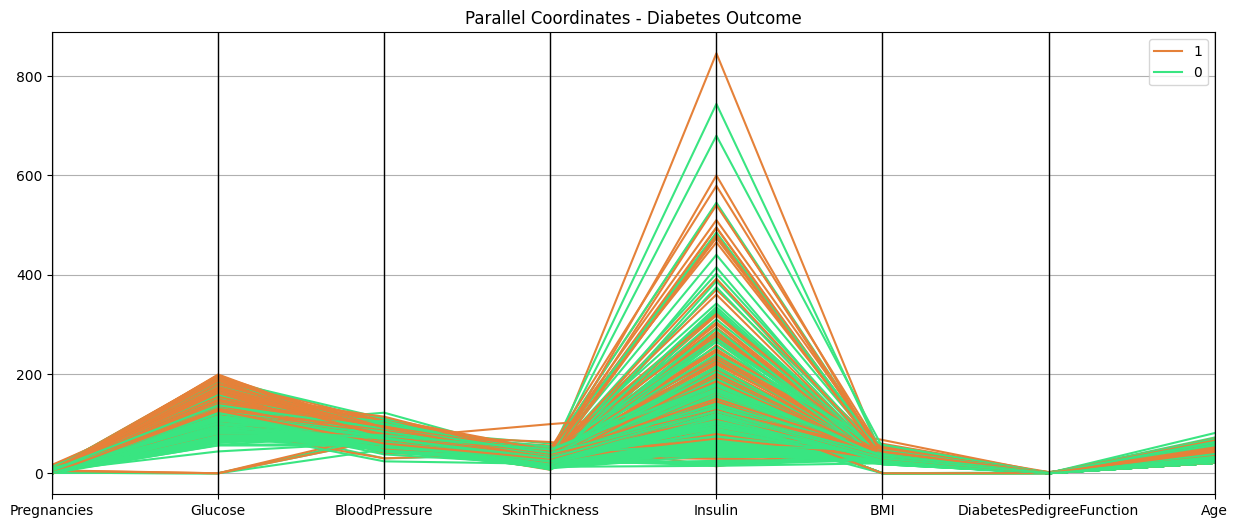

In [4]:
plt.figure(figsize=(15,6))
pd.plotting.parallel_coordinates(df, class_column="Outcome", color=("#E58139", "#39E581"))
plt.title("Parallel Coordinates - Diabetes Outcome")
plt.show()

## Creating model and training data

In [5]:
# Create the model
model = DecisionTreeClassifier(criterion="gini", random_state=42)

# Train the model
model.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Predictions

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0])

In [7]:
# Evaluate accuracy
model_accuracy = accuracy_score(y_test, y_pred)
model_accuracy

0.7402597402597403

### Observations
The decision tree model achieved 74% accuracy on the test set.

In [8]:
# Trying different criterions
criteria_list = ["gini", "entropy", "log_loss"]
accuracies = []

for criterion in criteria_list:
    # Create and train each tree model
    tree_model = DecisionTreeClassifier(criterion=criterion, random_state=42)
    tree_model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = tree_model.predict(X_test)
    
    # Store accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

In [9]:
# Showing results
criteria_list, accuracies

(['gini', 'entropy', 'log_loss'],
 [0.7402597402597403, 0.6948051948051948, 0.6948051948051948])

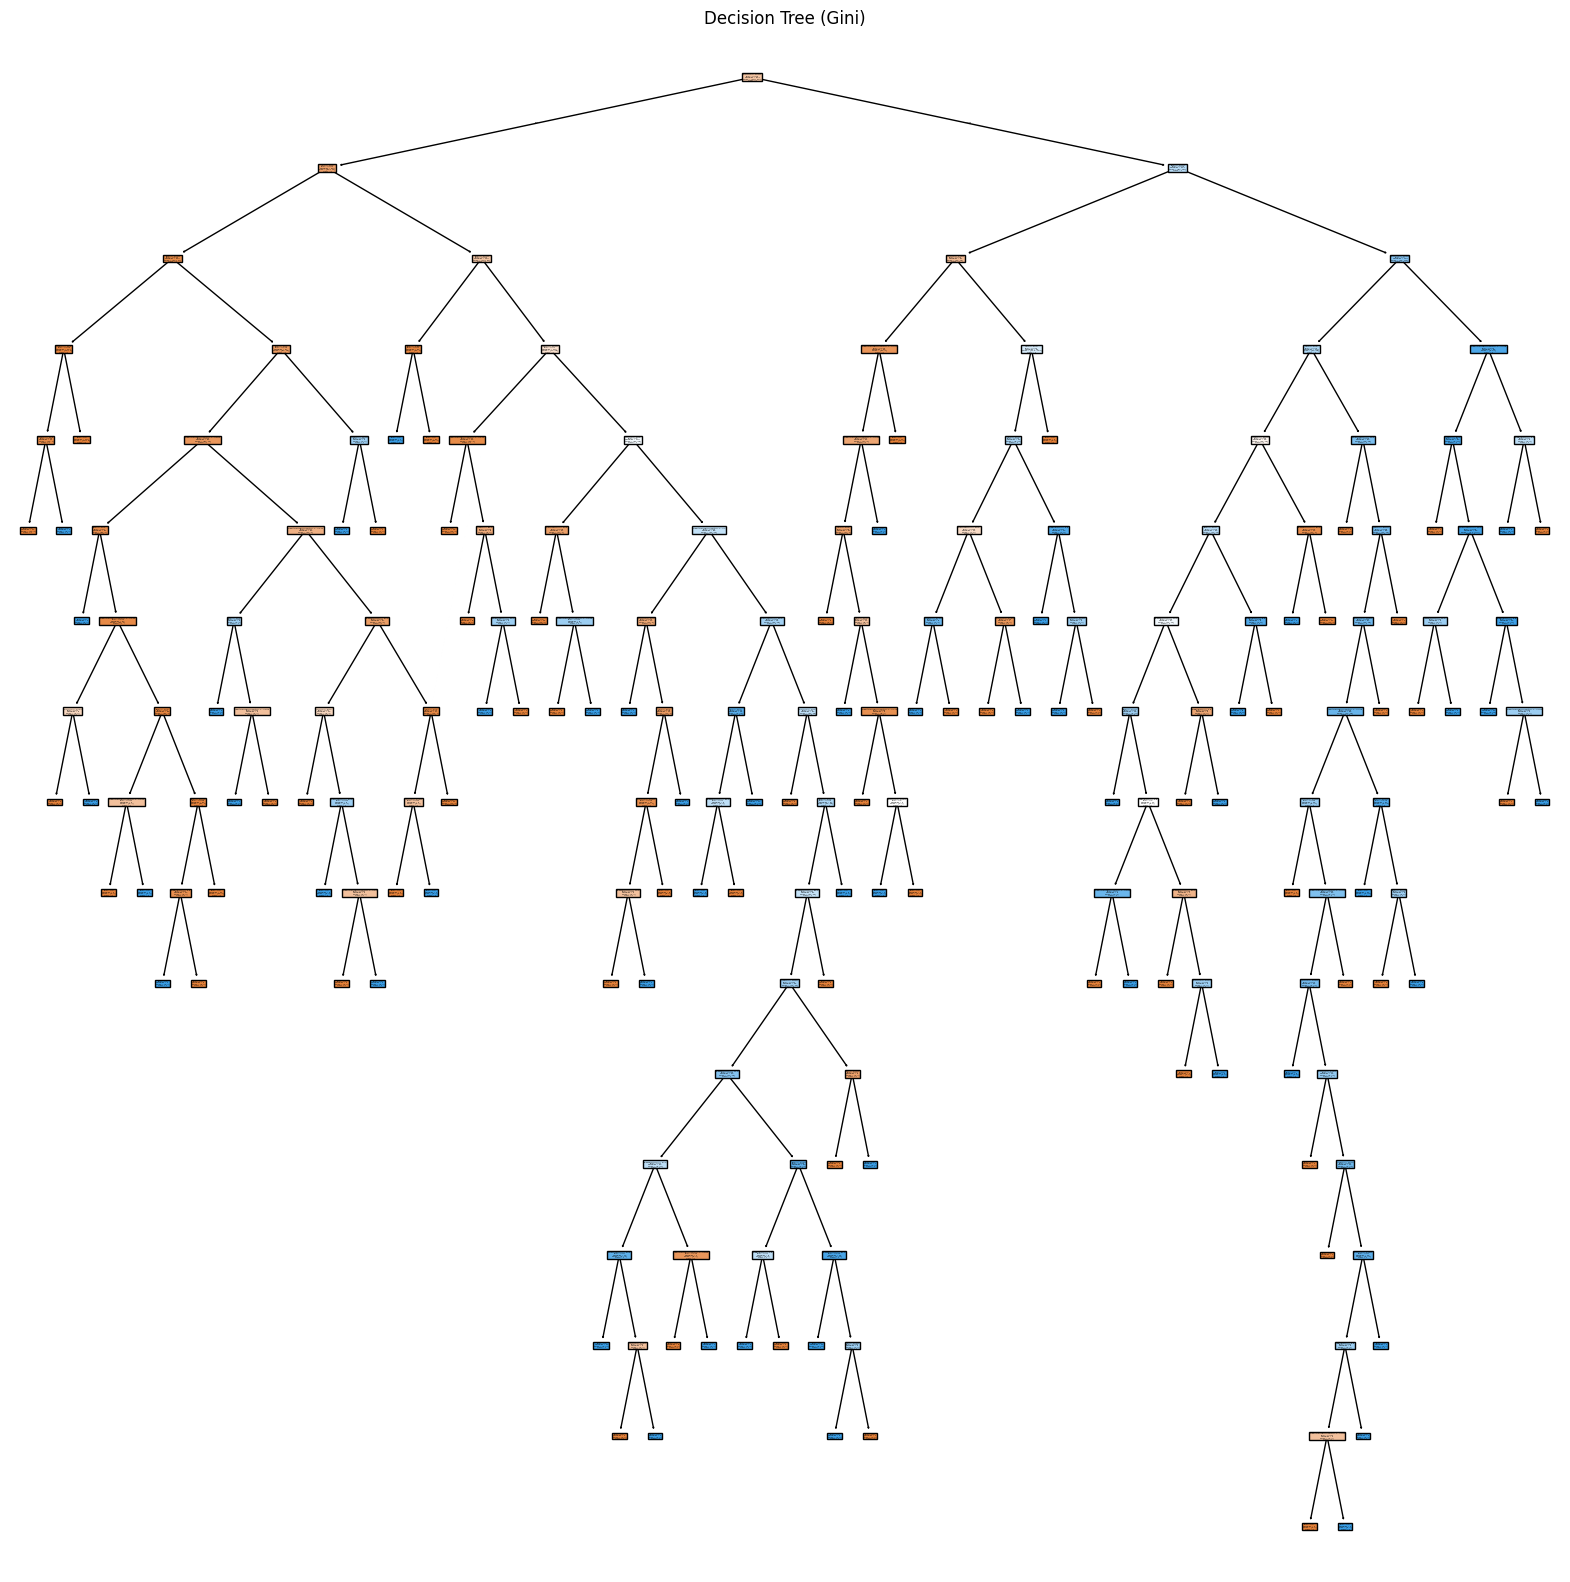

In [10]:
# Showing results of best model (Gini)
plt.figure(figsize=(20, 20))
tree.plot_tree(model, feature_names=X_train.columns, class_names=["0", "1"], filled=True)

plt.title("Decision Tree (Gini)")
plt.show()

### Observations
Gini performed the best for this dataset, achieving the highest test accuracy. Entropy and Log Loss gave slightly lower results, so Gini is the preferred criterion in this case.

## Optimization

In [11]:
# Hyperparameters to test
hyperparameters = {"max_depth": [None, 3, 5, 7, 10], "min_samples_split": [2, 5, 10], "min_samples_leaf": [1, 2, 4]}

# Initialize the grid search
grid_search = GridSearchCV(model, hyperparameters, scoring="accuracy", cv=5)
grid_search

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [12]:
# Train Grid Search
grid_search.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'max_depth': [None, 3, ...], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [13]:
# Looking for best parameters
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}

In [ ]:
# Evaluate optimized model on the test set
grid_model = grid_search.best_estimator_
test_accuracy = grid_model.score(X_test, y_test)
test_accuracy

0.7597402597402597

### Observations
After hyperparameter tuning, the Decision Tree achieved a test accuracy of 76%, improving from the initial 74%. Hyperparameter optimization helped the model generalize better.

## Saving model

In [15]:
with open("/workspaces/josefina-aispuro-merelles-machine-learning/models/decision_tree_gini_model.pkl", "wb") as file:
    pickle.dump(grid_model, file)